# NBA STATS ANALYSIS IN PYTHON:
This is my attempt to create a package that can be used to issue requests
to basketball-reference.com and analyze basketball statistics

In [66]:
from bs4 import BeautifulSoup as bs
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Below is a class for aquiring data from basketball-reference.com
### Allows the user to request data by player name and returns a dictionary of different types of statistics

In [67]:
class Data:

    class player:
        
        def __init__(self, player_name):
            self.player_name = player_name
            self._URL = "https://www.basketball-reference.com/players/"
            self.table_types = ['all_per_game', 'all_totals', 'all_per_minute', 'all_per_poss', 
                                'all_advanced', 'all_shooting', 'all_pbp', 'all_year-and-career-highs', 
                                'all_playoffs_per_game', 'all_playoffs_totals', 'all_playoffs_per_minute', 
                                'all_playoffs_per_poss', 'all_playoffs_advanced', 'all_playoffs_shooting', 
                                'all_playoffs_pbp', 'all_year-and-career-highs-po', 'all_all_star', 'all_sim_thru', 
                                'all_sim_career', 'all_all_college_stats', 'all_all_salaries']
            
        
            
        def fetch(self, table_types=["all_per_game"]):
            #flip the player's name (e.g. "Michael Jordan" -> ["Jordan", "Michael"])
            inv_player_name = self.player_name.lower().split(" ")[::-1]
            
            #create an url extension from the player name ("j/jordami01.html")
            player_tag = inv_player_name[0][0]+"/"+inv_player_name[0][0:5]+inv_player_name[1][0:2]+"01.html"

            #create the full url ("https://www.basketball-reference.com/players/j/jordami01.html")
            _FULL_URL = self._URL + player_tag

            #make a request to the page and report status of response
            response = requests.get(_FULL_URL)
            print("<status: "+str(response.status_code)+">")

            #parse the raw html
            soup = bs(response.content, "html.parser")

            
            
            
            #find all the tables
            tables = soup.findAll("div", {"class": "table_wrapper"})
            
            #map an index to each possible **kwarg
            table_map = {}
            for num, key in enumerate([t.get("id") for t in tables]):
                table_map[key] = num       
                                       
                                       
            #initiate list to hold all user requested data tables
            all_dfs = {}
            
    
            for t in table_types:
                
                #find the schema for the data table
                schema = list(set([d.get("data-stat") for d in tables[table_map[t]].findAll("td")]))

                #initialize a dictionary of empty lists mapped to the schema
                stats = {}
                for s in schema:
                    stats[s] = []

                #add the data from each tag to the appropriate list
                for d in tables[table_map[t]].findAll("td"):
                    if str(d.string)[0].isdigit() or str(d.string)[0] == ".":
                        value = float(d.string) 
                    else:
                        value = d.string

                    stats[d.get("data-stat")].append(value)

                    
                #create a dataframe from data, dropping rows where data has been aggregated (i.e. only return raw data)
                if ""
                
                if "age" in stats.keys():
                    stats_df = pd.DataFrame.from_dict(stats).dropna(subset=["age"])
                    
                elif "pos" in stats.keys():
                    stats_df = pd.DataFrame.from_dict(stats).dropna(subset=["pos"])
                    
                else:
                    stats_df = pd.DataFrame.from_dict(stats)
                    
                all_dfs[t] = stats_df
            
            #return dataframe
            return all_dfs

## Ever wondered how the Warriors shooting numbers compare in terms of points per shot on 2 pointers vs points per shot on 3 pointers?

Stephen Curry:
<status: 200>
Kevin Durant:
<status: 200>
Klay Thompson:
<status: 200>
Draymond Green:
<status: 200>
Andre Iguodala:
<status: 200>
Demarcus Cousins:
<status: 200>


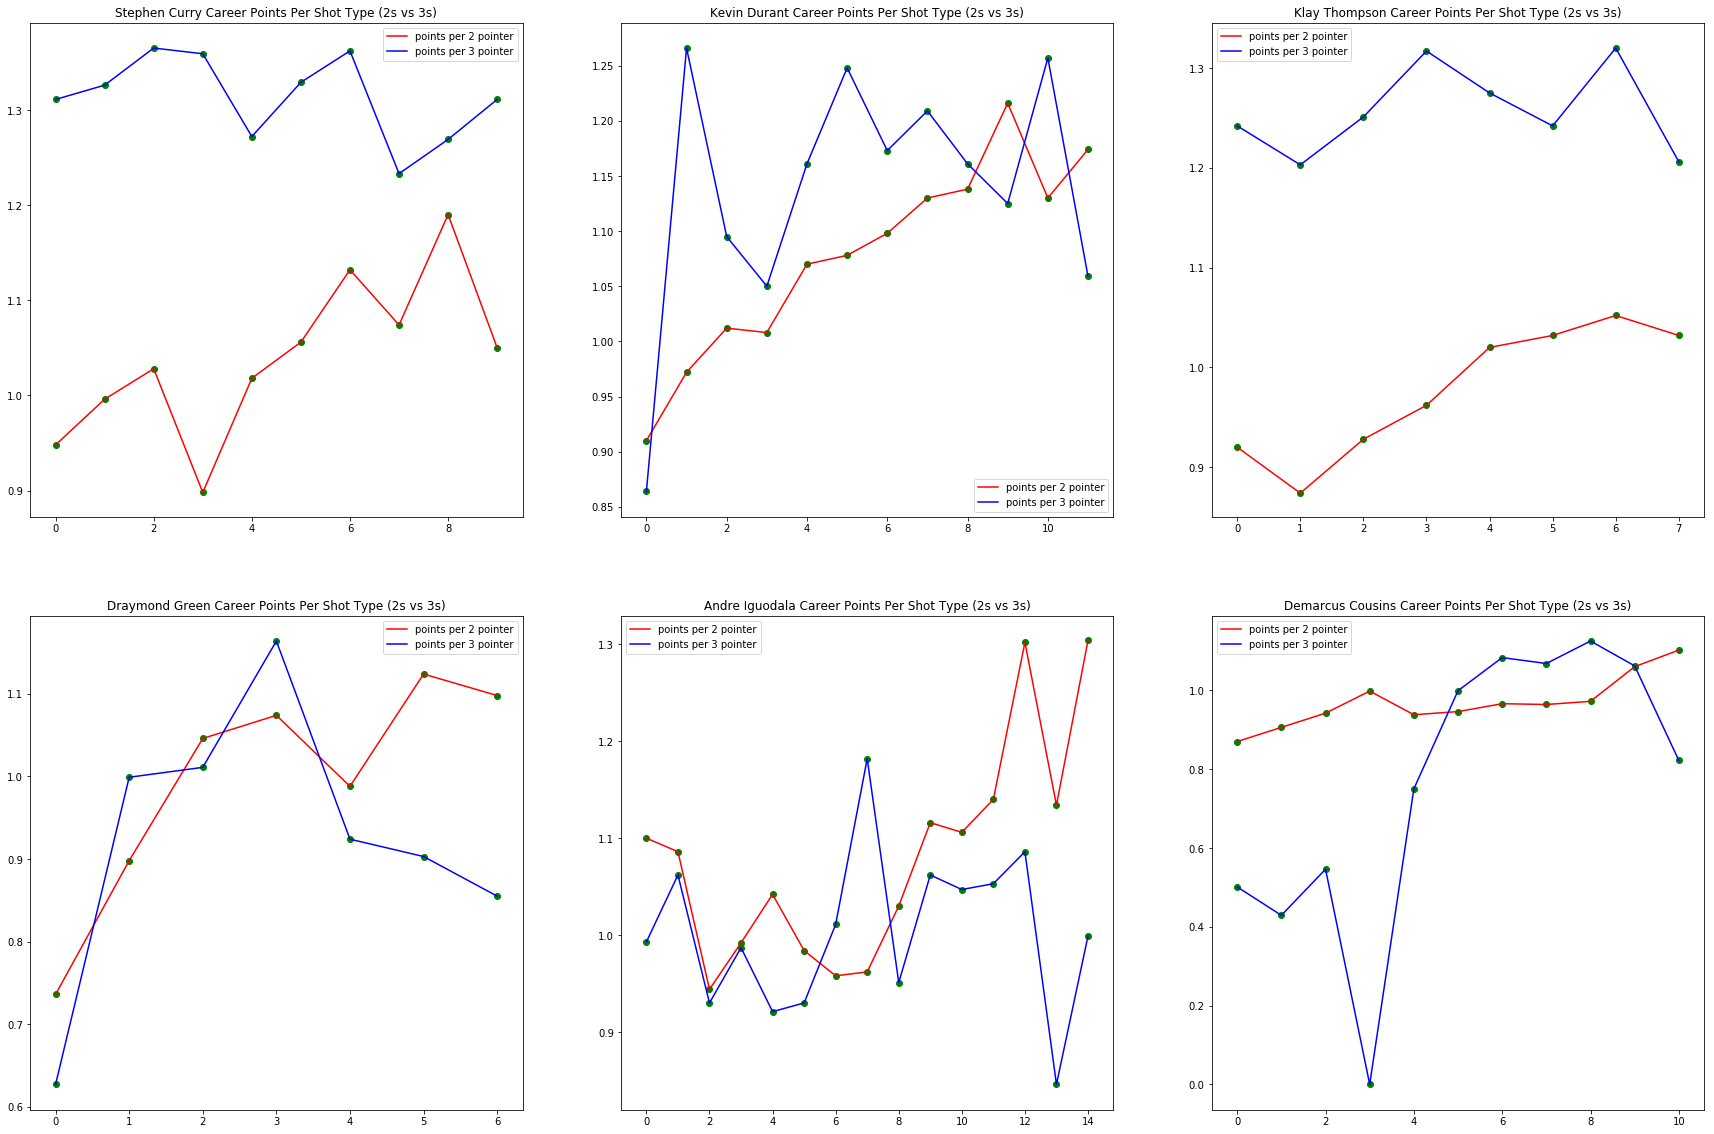

In [68]:
warriors = ["Stephen Curry","Kevin Durant","Klay Thompson","Draymond Green", "Andre Iguodala", "Demarcus Cousins"]

plt.figure(figsize=(30, 20))
for count, warrior in enumerate(warriors):
    print(warrior+":")
    player = Data.player(warrior).fetch()["all_per_game"]
    
    years = player.index
    
    pct_3s = player["fg3_pct"].values * 3.0
    pct_2s = player["fg2_pct"].values * 2.0
    
    plt.subplot(2,3,count+1)
    plt.plot(years, pct_2s, c="r", label="points per 2 pointer")
    plt.scatter(years,pct_2s,c="g")
    plt.plot(years, pct_3s, c="b", label="points per 3 pointer")
    plt.scatter(years,pct_3s,c="g")


    plt.title("{} Career Points Per Shot Type (2s vs 3s)".format(warrior))
    plt.legend()
